In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dataloading
import os
from sklearn.decomposition import PCA
import torch

In [2]:
df1 = dataloading.load_data1()
df1.head()

,AG-X,AG-Y,AG-Z,Acc-X,Acc-Y,Acc-Z,Gravity-X,Gravity-Y,Gravity-Z,RR-X,RR-Y,RR-Z,RV-X,RV-Y,RV-Z,cos,activity
0,-9.494311,5.423363,0.196757,-1.684995,0.401508,1.334339,-8.855526,4.199663,-0.335983,-0.762366,-0.750471,1.109060,0.232662,0.672025,0.101603,0.695649,Running
1,-8.890651,2.520043,0.963310,-0.895032,-1.936677,1.436671,-8.399648,5.060810,0.067106,-0.613229,-0.121966,1.906942,0.245168,0.660660,0.131849,0.697164,Running
2,-5.632800,1.581015,0.230293,2.350318,-3.642859,-1.169414,-7.911231,5.790931,0.218930,-0.142383,-0.352063,1.759936,0.264845,0.648175,0.163016,0.695091,Running
3,-6.322698,6.228244,-0.756644,0.812825,-0.722664,-0.334024,-7.523226,6.280006,0.364660,-0.148775,-0.382955,1.208129,0.299550,0.624335,0.195080,0.694564,Running
4,-7.640211,4.862821,1.715490,0.349670,-0.468074,-0.378780,-6.921238,6.909286,0.727059,-1.047857,0.379773,0.828895,0.310003,0.607825,0.220415,0.697039,Running


## Experiment B1: take dataset1 which is for 12 clients. dichotomize it into 12 clients and train 1, 2, 3 and 4 clients

In [3]:
# but first make modfiy the code to have only 1 test set
X_train,y_train,X_test,y_test,labels = dataloading.train_test_split(df1,test_size=0.2)

In [4]:
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (75358, 16), y_train: (75358,), X_test: (18840, 16), y_test: (18840,)


In [5]:
client_data = dataloading.to_client(data=(X_train,y_train,X_test,y_test),max_clients=12, only_one_test_data=True)

In [8]:
dataloading.save_client_data(client_data,"dataset_1_experiment_B1")

In [10]:
# hyperparams
# model = [16, 50, 50, 6]
# n_epochs = 5
# federated_rounds = 50

### n_clients = 1

0.8864


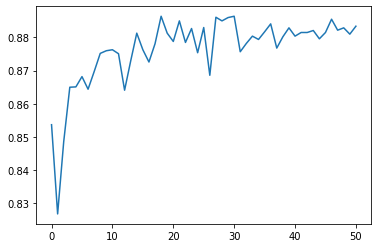

In [14]:
file_path = "/Users/admin/Desktop/experimentB11.txt"
with open(file_path, 'r') as file:
    b11_accuracy_list = [round(float(line.strip()), 4) for line in file]

plt.plot(b11_accuracy_list)
print(max(b11_accuracy_list))

### n_clients = 2

0.9072


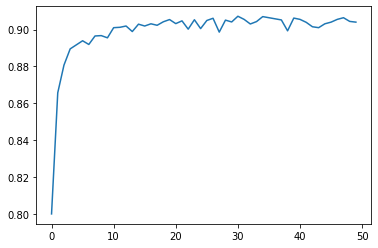

In [15]:
file_path = "/Users/admin/Desktop/experimentB12.txt"
with open(file_path, 'r') as file:
    b12_accuracy_list = [round(float(line.strip()), 4) for line in file]

plt.plot(b12_accuracy_list)
print(max(b12_accuracy_list))

### n_clients = 3

0.9136


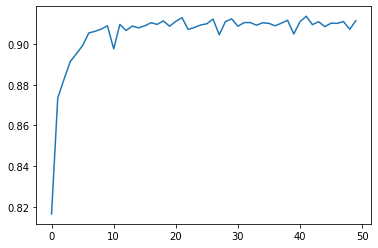

In [17]:
file_path = "/Users/admin/Desktop/experimentB13.txt"
with open(file_path, 'r') as file:
    b13_accuracy_list = [round(float(line.strip()), 4) for line in file]

plt.plot(b13_accuracy_list)
print(max(b13_accuracy_list))

0.9115


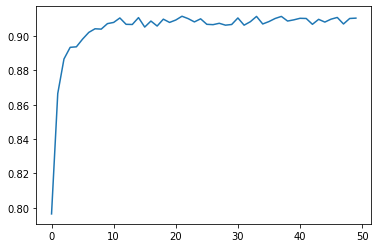

In [18]:
file_path = "/Users/admin/Desktop/experimentB13_2.txt"
with open(file_path, 'r') as file:
    b13_accuracy_list = [round(float(line.strip()), 4) for line in file]

plt.plot(b13_accuracy_list)
print(max(b13_accuracy_list))

### n_clients = 4

0.9172


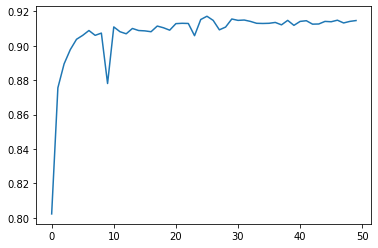

In [19]:
file_path = "/Users/admin/Desktop/experimentB14.txt"
with open(file_path, 'r') as file:
    b14_accuracy_list = [round(float(line.strip()), 4) for line in file]

plt.plot(b14_accuracy_list)
print(max(b14_accuracy_list))

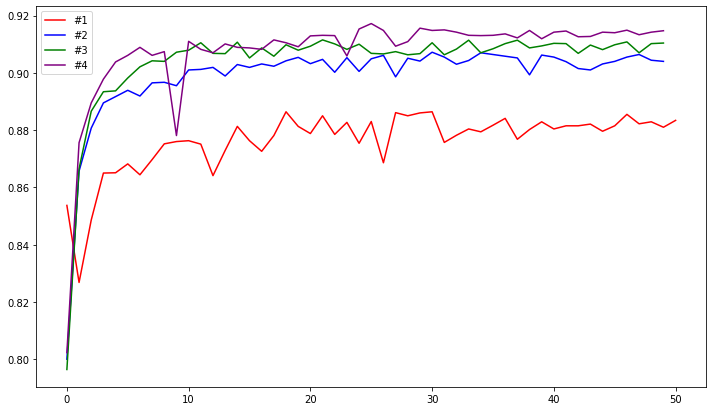

In [25]:
plt.figure(figsize=(12,7))
plt.plot(b11_accuracy_list, color='red', label='#1')
plt.plot(b12_accuracy_list, color='blue', label='#2')
plt.plot(b13_accuracy_list, color='green', label='#3')
plt.plot(b14_accuracy_list, color='purple', label='#4')
plt.legend()
plt.show()